Exploratory Data Analysis

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for Data Analyst Roles in US

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

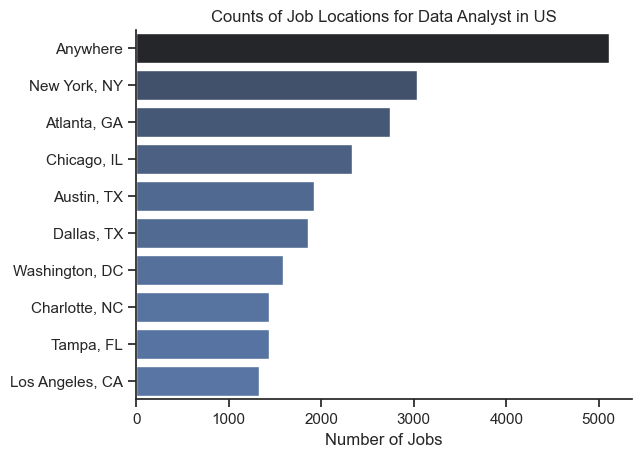

In [3]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame().copy()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Job Locations for Data Analyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()

Job Opportunities

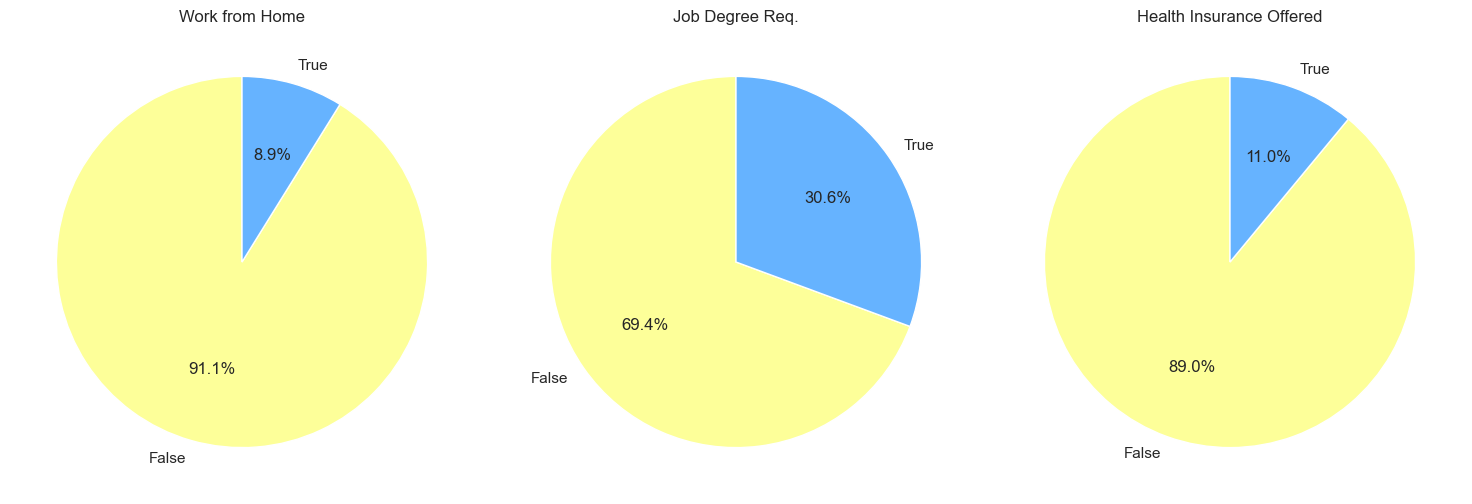

In [4]:
# Mapping
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create a 1x3 grid of subplots (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted figure size for better layout

# Iterate through each column-title pair to generate pie charts
for i, (column, title) in enumerate(dict_column.items()):
    # Get counts of True/False for each pie charts
    value_counts = df[column].value_counts().sort_index()  # Ensures False is first, True second

    # Plot pie chart with percentages
    ax[i].pie(
        value_counts,
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90,
        colors=["#fdff99", '#66b3ff']  # Optional: add colors for visual clarity
    )
    ax[i].set_title(title)

# Overall layout adjustments
plt.tight_layout()
plt.show()


Companies to Explore

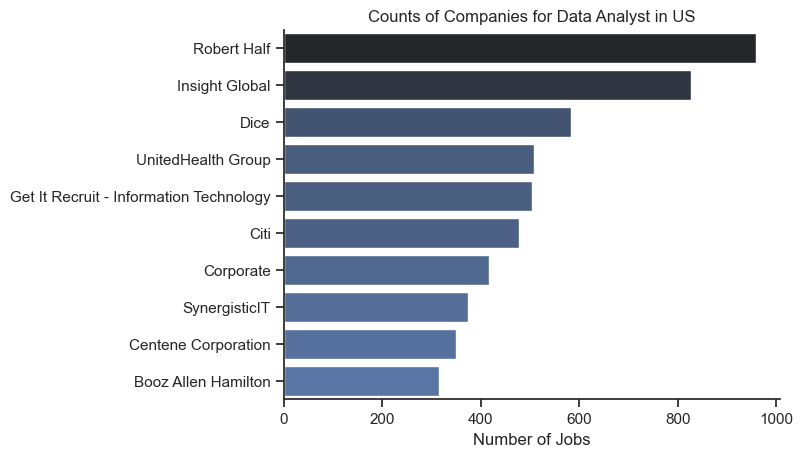

In [5]:
df_plot_C = df_DA_US['company_name'].value_counts().head(10).to_frame().copy()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_C, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Companies for Data Analyst in US')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()